In [160]:
import tensorflow.keras
keras.__version__

'2.4.0'

In [229]:
import spyder
spyder.__version__

ModuleNotFoundError: No module named 'spyder'

In [162]:
import tensorflow.keras as keras

In [163]:
#Import ImageDataGenerator Library

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [164]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_359bbc161add4ae182cddab9ed9d3bec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='dBQO07j11IqxUqvTfbmMs8GLo5y66ApfjkScSEIN_La7',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_4 = client_359bbc161add4ae182cddab9ed9d3bec.get_object(Bucket='wildplantsedibilityusingwatsonstu-donotdelete-pr-qj10gt3ull9jj6', Key='dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [165]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [166]:
#Define the parameters /arguments for ImageDataGenerator class to train set 
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                  rotation_range=180) 


#Define the parameters /arguments for ImageDataGenerator class to test set
test_datagen = ImageDataGenerator(rescale=1./255)

In [167]:
pwd

'/home/wsuser/work'

In [168]:
#Applying ImageDataGenerator functionality to trainset
x_train=train_datagen.flow_from_directory(
    directory= r"dataset/train_set",
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')

#Applying ImageDataGenerator functionality to test set
x_test=test_datagen.flow_from_directory(
    directory= r"dataset/test_set",
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')

Found 576 images belonging to 8 classes.
Found 269 images belonging to 8 classes.


In [169]:
'''Importing the model building libraries'''
#to define linear initializations import Sequential
from tensorflow.keras.models import Sequential
#To add layers import Dense
from tensorflow.keras.layers import Dense
# to create a convolution kernel import Convolution2D
from tensorflow.keras.layers import Conv2D
# to create a Max pooling Layer
from tensorflow.keras.layers import MaxPool2D
# to create a Flatten Layer
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

In [170]:
# Initializing the model
model = Sequential()

In [171]:
# Adding CNN layers
model.add(Conv2D(64,3,3,input_shape=(128,128,3),activation='relu'))

In [172]:
# Adding Max pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))

In [173]:
# Adding CNN layers
#model.add(Conv2D(64,3,3,activation='relu'))

In [174]:
# Adding Max pooling Layer
#model.add(MaxPool2D(pool_size=(2,2)))

In [175]:
# Adding Flatten Layer
model.add(Flatten())

In [176]:
model.add(Dropout(0.3))

In [177]:
# Adding Hidden Layers
#model.add(Dense(activation='relu',units=150))

In [178]:
# Adding Hidden Layers
model.add(Dense(activation='relu',units=75))

In [179]:
# Adding output Layers
model.add(Dense(units=8,activation='softmax'))

In [180]:
#check the summary of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 42, 42, 64)        1792      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28224)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 28224)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 150)               4233750   
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 1208      
Total params: 4,236,750
Trainable params: 4,236,750
Non-trainable params: 0
____________________________________________

In [181]:
# Configure the learning process
model.compile(optimizer = 'adam',loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [182]:
#check the index position of classes
print(x_train.class_indices)

{'Mountain Laurel_nonedible': 0, 'Peppergrass_edible': 1, 'Purple Deadnettle_edible': 2, 'Rhododendron_nonedible': 3, 'Toothwort_edible': 4, 'Wild Grape Vine_edible': 5, 'Wild Leek_edible': 6, 'rattlebox_nonedible': 7}


In [208]:
# Training the model
r = model.fit(x_train,steps_per_epoch=14,
                              validation_data=x_test,
                              epochs=10,validation_steps=5)

Epoch 1/10
14/14 [==============================] - 5s 353ms/step - loss: 1.1185 - accuracy: 0.5982 - val_loss: 1.4134 - val_accuracy: 0.5188
Epoch 2/10
14/14 [==============================] - 5s 341ms/step - loss: 1.0613 - accuracy: 0.6183 - val_loss: 1.5042 - val_accuracy: 0.5312
Epoch 3/10
14/14 [==============================] - 5s 355ms/step - loss: 1.0345 - accuracy: 0.6473 - val_loss: 1.5479 - val_accuracy: 0.4313
Epoch 4/10
14/14 [==============================] - 5s 342ms/step - loss: 1.0286 - accuracy: 0.6317 - val_loss: 1.5632 - val_accuracy: 0.4875
Epoch 5/10
14/14 [==============================] - 5s 340ms/step - loss: 1.0602 - accuracy: 0.6272 - val_loss: 1.4834 - val_accuracy: 0.4938
Epoch 6/10
14/14 [==============================] - 5s 340ms/step - loss: 1.0580 - accuracy: 0.6496 - val_loss: 1.6873 - val_accuracy: 0.3938
Epoch 7/10
14/14 [==============================] - 5s 364ms/step - loss: 1.0435 - accuracy: 0.6272 - val_loss: 1.5458 - val_accuracy: 0.4812
Epoch 

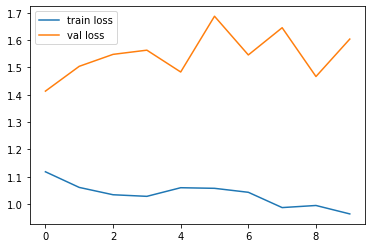

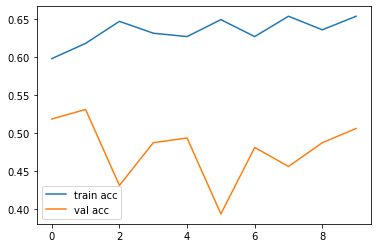

<Figure size 432x288 with 0 Axes>

In [210]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [212]:
#save the model

from tensorflow.keras.models import load_model

model.save('WildPlantEdibility.h5')

In [213]:
!tar -zcvf image-classification-model_new.tgz WildPlantEdibility.h5


WildPlantEdibility.h5


In [214]:
!pip install watson-machine-learning-client --upgrade


     |████████████████████████████████| 538 kB 22.1 MB/s eta 0:00:01


In [215]:
from ibm_watson_machine_learning import APIClient

In [216]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"AFQEiLlia1AeRsSOHvJ-qE1ltuAPaMmG6ziaR7ktBFJN"
}

In [217]:
client = APIClient(wml_credentials=wml_credentials)

In [218]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [219]:
space_uid=guid_from_space_name(client,'CNNwildplants')
print("Space UID="+space_uid)

Space UID=a110607d-6f52-4f4f-bd54-e061fb74d5b0


In [220]:
client.set.default_space(space_uid)

'SUCCESS'

In [221]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [222]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_2.4-py3.7")
software_spec_uid

'65e171d7-72d1-55d9-8ebb-f813d620c9bb'

In [223]:
model_details = client.repository.store_model(model='image-classification-model_new.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.4",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid})

model_id = client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/ibm_watson_machine_learning/repository.py:1458: UserWarning: This method is deprecated, please use get_model_id()
  warn("This method is deprecated, please use get_model_id()")


In [224]:
model_id

'b10575f1-ee5d-4dae-be28-84d21547639d'

In [225]:
client.repository.download(model_id,'WildPlants.tar.gz')

Successfully saved model content to file: 'WildPlants.tar.gz'


'/home/wsuser/work/WildPlants.tar.gz'

In [226]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('WildPlantEdibility.h5')